In [2]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 
from utils.generation import multivariate_t_rvs, fechner_corr

from scipy import stats
import pandas as pd
import numpy as np

# Experiment with Student sampling with fechner corr
Degree of freedom is 3. 

Considering graph of 40 vertices: 2 clusters of size 20.  
Weighted average degree is fixed with value 16.  
r_out is from $0$ to $r_{out_{max}}$.

In [3]:
rs = get_rs_from_fixed_weighted_degree(degree=16, cluster_size= 20, num_clusters=2,r_out_bound = (0,1,200))

In [4]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=200,
    corr_estimator= fechner_corr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


Generating graphs started


 21%|██        | 17/82 [00:28<01:47,  1.66s/it]

100%|██████████| 4/4 [03:27<00:00, 51.96s/it]


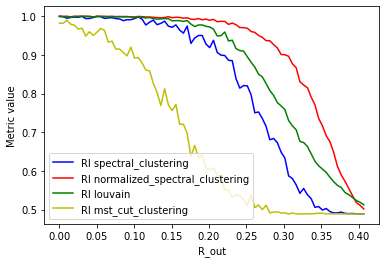

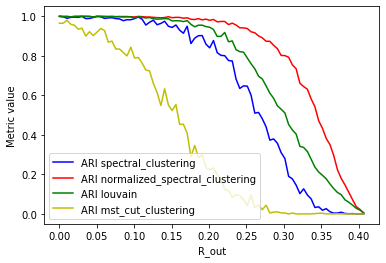

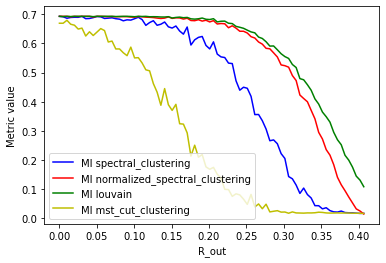

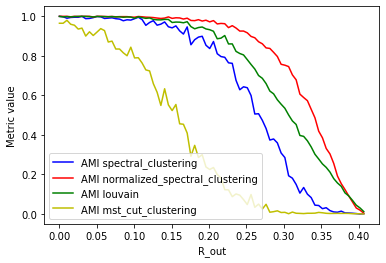

In [4]:
metrics40 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df40 = metrics_to_df(metrics40, rs)
#df40.to_csv('student3_graph_40_degree16_sample_40_repeates1000_r_out_200')
df40.to_csv('fechner_student3_graph_40_degree16_sample_40_repeates120_r_out_200')

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 80,
    num_repeats=120,
    corr_estimator=fechner_corr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


100%|██████████| 4/4 [02:09<00:00, 32.34s/it]


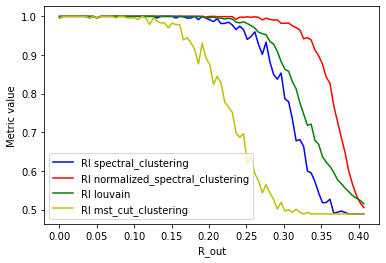

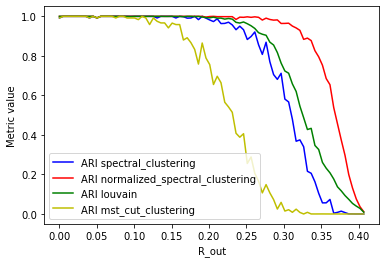

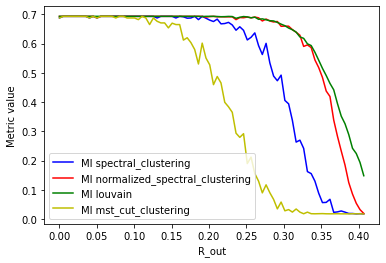

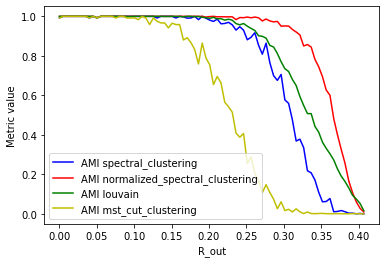

In [6]:
metrics80 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df80 = metrics_to_df(metrics80, rs)
#df80.to_csv('student3_graph_40_degree16_sample_80_repeates1000_r_out_200')
df80.to_csv('fechner_student3_graph_40_degree16_sample_80_repeates120_r_out_200')

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 400,
    num_repeats=120,
    corr_estimator= fechner_corr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


100%|██████████| 4/4 [01:11<00:00, 17.86s/it]


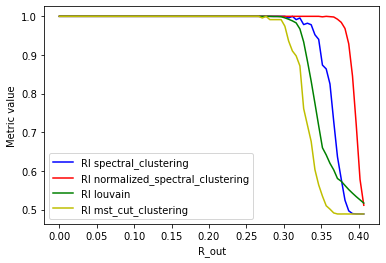

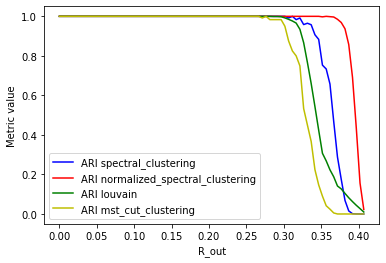

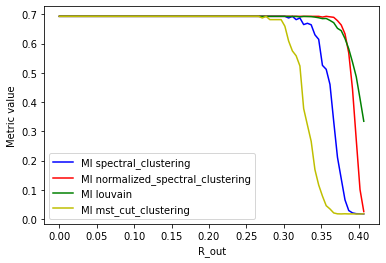

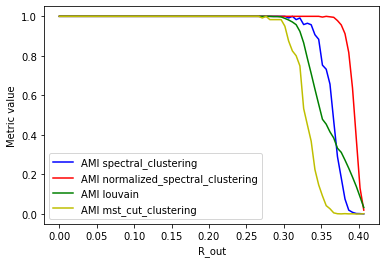

In [8]:
metrics400 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df400 = metrics_to_df(metrics400, rs)
#df400.to_csv('student3_graph_degree16_sample_400_repeates1000_r_out_200')
df400.to_csv('fechner_student3_graph_40_degree16_sample_400_repeates120_r_out_200')

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 1000,
    num_repeats=120,
    corr_estimator=fechner_corr, 
    distribution = multivariate_t_rvs,
    **{'df':3})


100%|██████████| 4/4 [00:48<00:00, 12.03s/it]


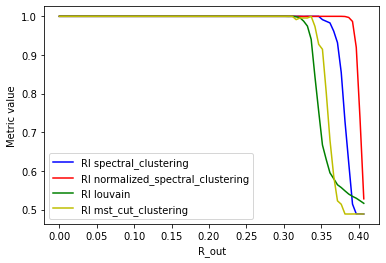

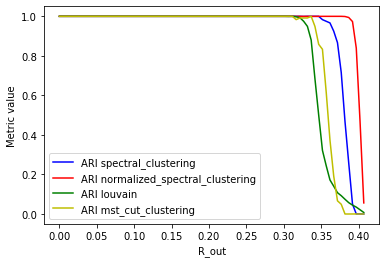

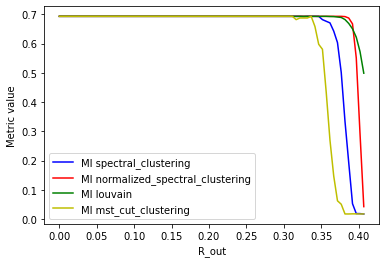

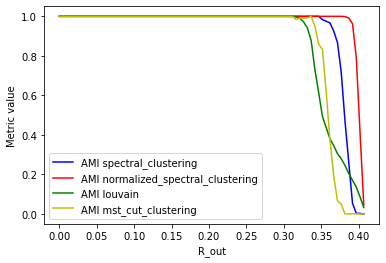

In [10]:
metrics1000 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df1000 = metrics_to_df(metrics1000, rs)
#df1000.to_csv('student3_graph_degree16_sample_1000_repeates1000_r_out_200')
df1000.to_csv('fechner_student3_graph_40_degree16_sample_1000_repeates120_r_out_200')

## Comparison Kendal with Fechner

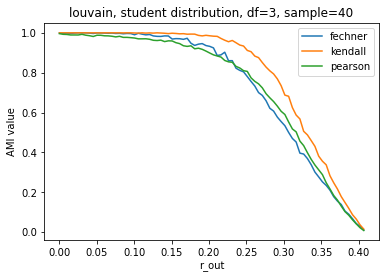

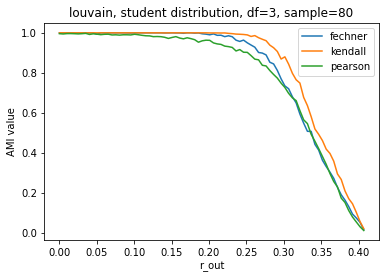

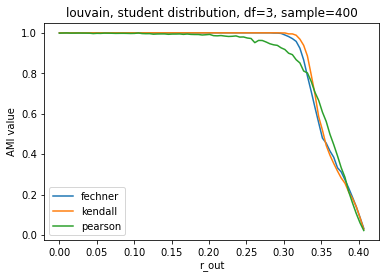

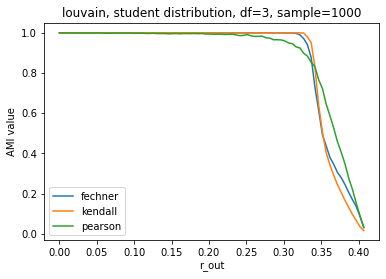

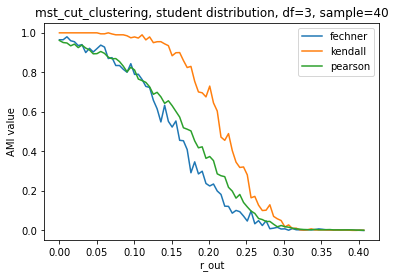

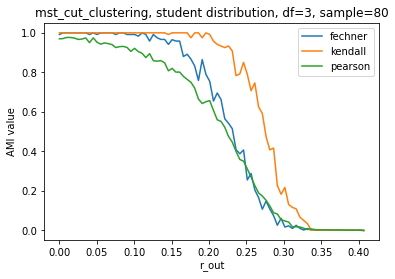

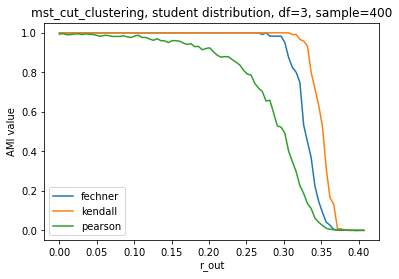

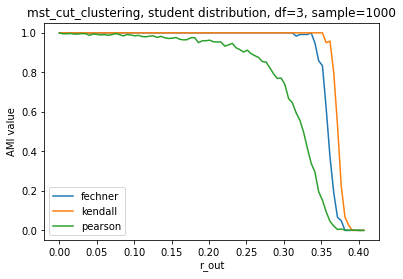

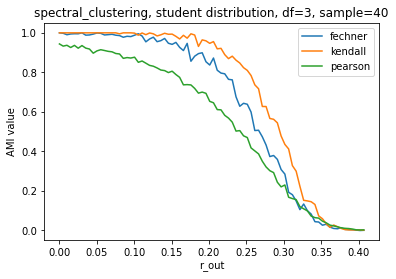

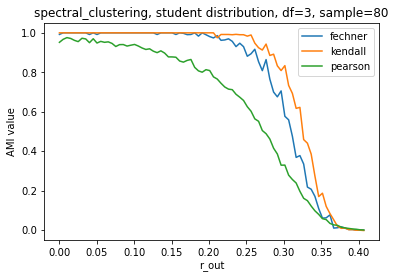

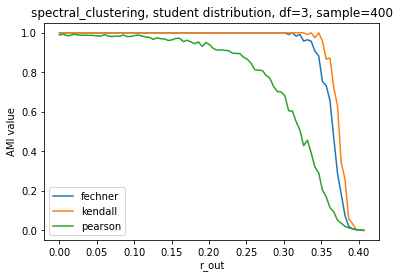

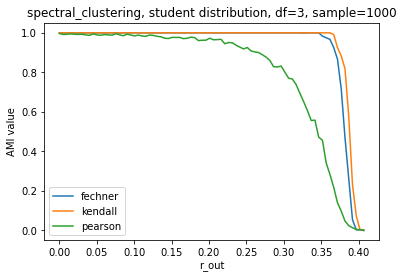

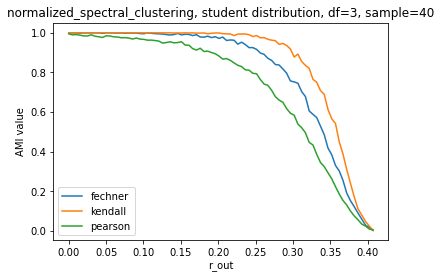

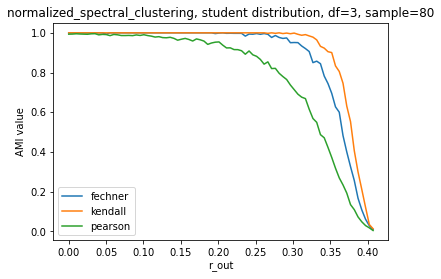

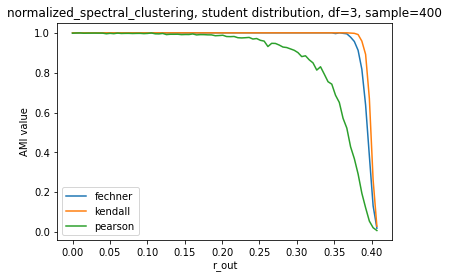

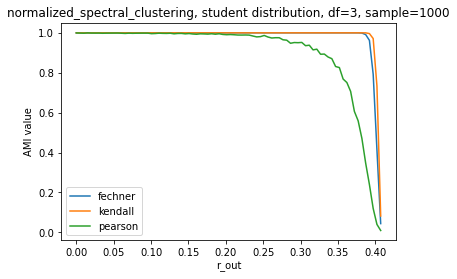

In [11]:
df40t3 = pd.read_csv('kendall_student3_graph_40_degree16_sample_40_repeates120_r_out_200',header=[0, 1], index_col=0 )
df80t3 = pd.read_csv('kendall_student3_graph_40_degree16_sample_80_repeates120_r_out_200',header=[0, 1], index_col=0 )
df400t3 = pd.read_csv('kendall_student3_graph_40_degree16_sample_400_repeates120_r_out_200',header=[0, 1], index_col=0 )
df1000t3 = pd.read_csv('kendall_student3_graph_40_degree16_sample_1000_repeates120_r_out_200',header=[0, 1], index_col=0 )

df40t3p = pd.read_csv('student3_graph_40_degree16_sample_40_repeates1000_r_out_200',header=[0, 1], index_col=0 )
df80t3p = pd.read_csv('student3_graph_40_degree16_sample_80_repeates1000_r_out_200',header=[0, 1], index_col=0 )
df400t3p = pd.read_csv('student3_graph_degree16_sample_400_repeates1000_r_out_200',header=[0, 1], index_col=0 )
df1000t3p = pd.read_csv('student3_graph_degree16_sample_1000_repeates1000_r_out_200',header=[0, 1], index_col=0 )
pearson_dfs = [df40t3p, df80t3p,  df400t3p, df1000t3p]

kendall_dfs = [df40t3, df80t3,  df400t3, df1000t3]
fechner_dfs = [df40, df80,  df400, df1000]
sample_sizes = [40, 80, 400, 1000]
metric = 'AMI'
algos = list(set(x[0] for x in list(df40t3.columns)))
for algo in algos:
    for i, sample_size in enumerate(sample_sizes):
        df = pd.DataFrame(list(zip(rs[1], fechner_dfs[i][algo][metric].values, kendall_dfs[i][algo][metric].values, pearson_dfs[i][algo][metric].values,)), columns = ['r_out', 'fechner', 'kendall', 'pearson']).set_index(['r_out'])
        df.plot(title=algo + ', student distribution, df=3, ' + 'sample=' + str(sample_size), ylabel = metric + ' value')
